<a href="https://colab.research.google.com/github/ahmedmagdy99/Sentiment-Analysis/blob/main/Logestic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import time
from wordcloud import WordCloud, STOPWORDS
import re

In [ ]:
url = "https://raw.githubusercontent.com/ahmedmagdy99/IMDB/main/IMDB_Dataset17k.csv"

df = pd.read_csv(url)

print(df.shape)
print(df.head())

(16999, 2)
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [ ]:
start_time = time.time()

def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+|@[^\s]+')
    cleantext = url_pattern.sub(r'', text)
    return cleantext

def cleanhtml(raw_html):
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr, '', raw_html)
  cleantext = re.sub(' +', ' ', cleantext)
  return cleantext

df["review"] = df["review"].map(remove_urls)
df["review"] = df["review"].map(cleanhtml)

print(df.head())
print("--- %s seconds ---" % (time.time() - start_time))

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. The filming tec...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
--- 1.2199525833129883 seconds ---


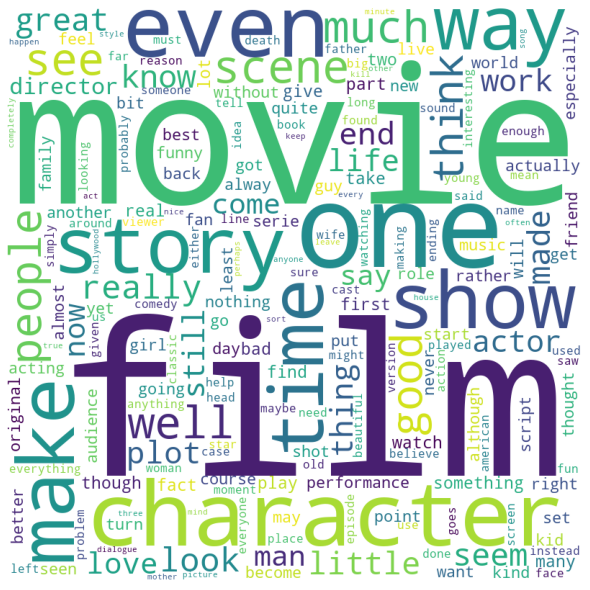

In [ ]:
#Word Cloud
words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.review:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    words += " ".join(tokens) + " "

wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=stopwords,
                      min_font_size=10).generate(words)

# plot the WordCloud image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
#interpolation='bilinear'
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. The filming tec...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
                                                   review sentiment
count                                               16999     16999
unique                                              16948         2
top     Loved today's show!!! It was a variety and not...  negative
freq                                                    3      8610
['00', '000', '00001', '001', '0069', '007', '00am', '00o', '00pm', '00s']
   00  000  00001  001  0069  007  ...  ís  ísnt  óli  önsjön  über  üvegtigris
0   0    0      0    0     0    0  ...   0     0    0       0     0           0
1   0    0      0    0     0    0  ...   0     

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


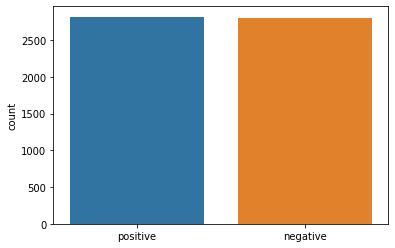

Model Accuracy:  0.8680926916221033
[[2438  361]
 [ 379 2432]]
--- 7.941696405410767 seconds ---


In [ ]:
start_time = time.time()

# Print the head of df
print(df.head())
print(df.describe())

# Create a series to store the labels: y
y = df.sentiment

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['review'], y, test_size = 0.33, random_state=53)

# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer(stop_words = 'english')


# Transform the training data using only the 'text' column values: count_train
count_train = count_vectorizer.fit_transform(X_train)

# Transform the test data using only the 'text' column values: count_test
count_test = count_vectorizer.transform(X_test)

# Print the first 10 features of the count_vectorizer
print(count_vectorizer.get_feature_names()[:10])

# Create the CountVectorizer DataFrame: count_df
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

# Print the head of count_df
print(count_df.head())

#lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
log_reg = LogisticRegression()

# Fit the classifier to the training data
log_reg.fit(count_train, y_train)

# Create the predicted tags: pred
pred = log_reg.predict(count_test)

sns.countplot(x=pred)
plt.show()

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print("Model Accuracy: ",score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred,labels=['positive','negative'])
print(cm)
print("--- %s seconds ---" % (time.time() - start_time))